In [1]:
# Code written by: Michael Bramble | michael.s.bramble@jpl.nasa.gov
# script to plot all ASCII txt spectral files in a folder for visualizaiton only

import os
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import glob


In [2]:
def read_txt_files(path):
    
    txt_files = glob.glob(os.path.join(path, "*.txt")) # Get all .txt files in specified folder path

    spectral_data = {}

    for file in txt_files: 
        
        df = pd.read_csv(file,header=0,skiprows=2,delimiter="\t",usecols=[0, 1],names=["wavelength","reflectance"])
        #  skips first two rows (RELAB header line + column titles), and only the first two columns (ignore standard deviation where present)
        
        spectral_data["{0}".format(os.path.basename(os.path.normpath(file)))] = [df.loc[:,"wavelength"],df.loc[:,"reflectance"]]
    
    return spectral_data

In [3]:
endmember_path = '/Users/bramble/My Drive/_JPL_AMD/endmembers/jarosite/'
spectral_data = read_txt_files(endmember_path)
# spectral_data

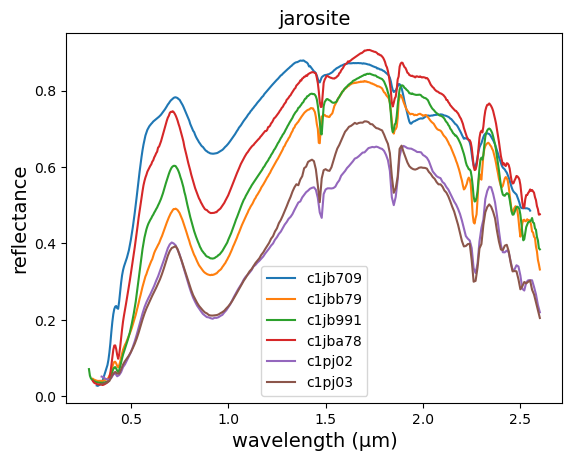

In [4]:

for key in spectral_data:
        
        spectra = spectral_data[key]
        wavelength = spectra[0]
        reflectance = spectra[1]
        spec_label = key.split('.')
        plt.plot(wavelength, reflectance, label = spec_label[0])

plt.title('jarosite', fontsize=14)
plt.xlabel('wavelength (µm)', fontsize=14)
plt.ylabel('reflectance', fontsize=14)
plt.legend()
